# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import statsmodels.api as sm
import seaborn as sns

In [48]:
#%matplotlib inline

from IPython.core.pylabtools import figsize
figsize(12, 8)

sns.set()

In [49]:
athletes = pd.read_csv("athletes.csv")

In [50]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [51]:
athletes.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [52]:
athletes.describe()

,id,height,weight,gold,silver,bronze
count,1.153800e+04,11208.000000,10879.000000,11538.000000,11538.000000,11538.000000
mean,4.999885e+08,1.766282,72.068205,0.057722,0.056769,0.061016
std,2.908648e+08,0.112719,16.177334,0.255910,0.239147,0.243320
min,1.834700e+04,1.210000,31.000000,0.000000,0.000000,0.000000
25%,2.450997e+08,1.690000,60.000000,0.000000,0.000000,0.000000
50%,5.002011e+08,1.760000,70.000000,0.000000,0.000000,0.000000
75%,7.539874e+08,1.840000,81.000000,0.000000,0.000000,0.000000
max,9.999878e+08,2.210000,170.000000,5.000000,2.000000,2.000000


## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [53]:
amostra_altura = get_sample(athletes, "height", 3000)
amostra_altura

1811     1.79
7962     1.81
10280    1.83
317      1.68
6989     2.01
         ... 
1483     1.75
2586     1.78
2949     1.60
10268    1.75
5892     1.76
Name: height, Length: 3000, dtype: float64

In [54]:
def q1():
    alpha = 0.05
    if (sct.shapiro(amostra_altura)[1] > alpha):
        return True
    else:
        return False
    pass
q1()

False

__Para refletir__:

1. Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?

**R:** Sim, segue o padrão de uma distribuição normal


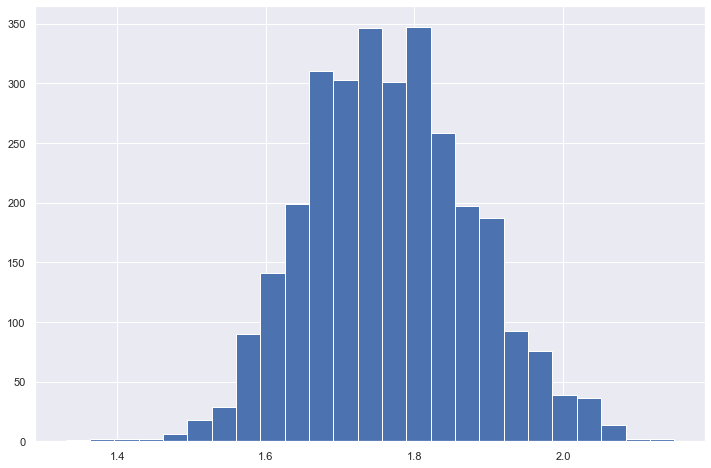

In [55]:
plt.hist(x=amostra_altura, bins=25);

1. Plote o qq-plot para essa variável e a analise.


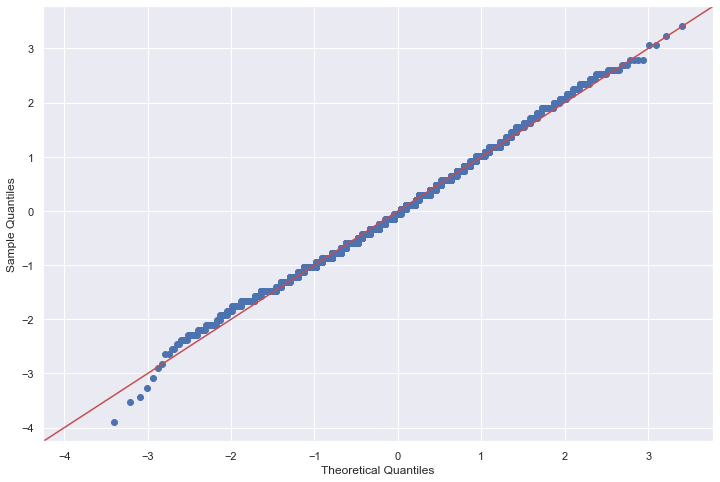

In [56]:
    sm.qqplot(amostra_altura, fit=True, line="45");

1. Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).


## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [94]:
def q2():
    alpha = 0.05
    if (sct.jarque_bera(amostra_altura)[1] > alpha):
        return True
    else:
        return False
    pass
q2()

False

__Para refletir__:

2. Esse resultado faz sentido?

**R:** Sim, o histograma exibe a ausência de caldas

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [95]:
amostra_peso = get_sample(athletes, "weight", 3000)
amostra_peso

2162      80.0
3450      70.0
6886      69.0
3871      66.0
6383      82.0
         ...  
11255     63.0
9790      61.0
4127     125.0
463       54.0
6664      62.0
Name: weight, Length: 3000, dtype: float64

In [59]:
def q3():
    alpha = 0.05
    if (sct.normaltest(amostra_peso)[1] > alpha):
        return True
    else:
        return False
    pass
q3()

False

In [97]:
# Ou tra maneira de responder essa questão

def q3_v2():
    dagostino_stats, dagostino_p_valor = sct.normaltest(amostra_peso)
    #ou:  _, dagostino_p_valor = sct.normaltest(amostra_peso)
    return bool(dagostino_p_valor > 0.05)

q3_v2()


False

__Para refletir__:

3. Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?



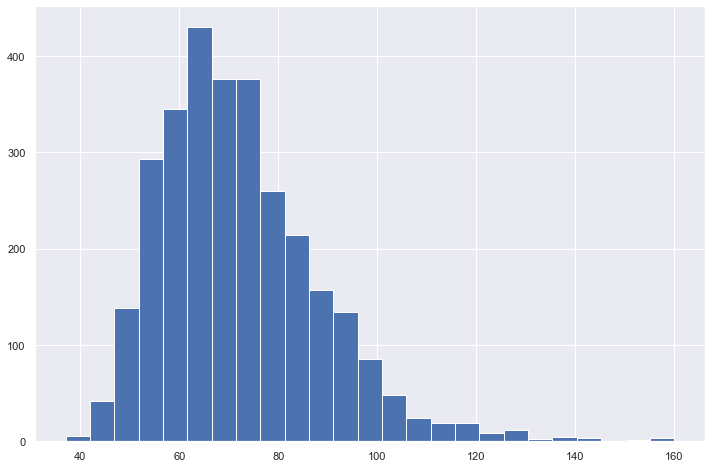

In [34]:
plt.hist(x=amostra_peso, bins=25);

### Box plot
O box plot dá uma idéia da posição, dispersão, assimetria, caudas e dados discrepantes (outliers). 
A posição central é dada pela mediana e a dispersão por $IIQ$. As posições relativas de $Q1$, $Mediana$ e $Q3$ dão uma noção da
simetria da distribuição. Os comprimentos das cauda são dados pelas linhas que vão do retângulo aos valores remotos e pelos 
valores atípicos.



3. Um _box plot_ também poderia ajudar a entender a resposta.

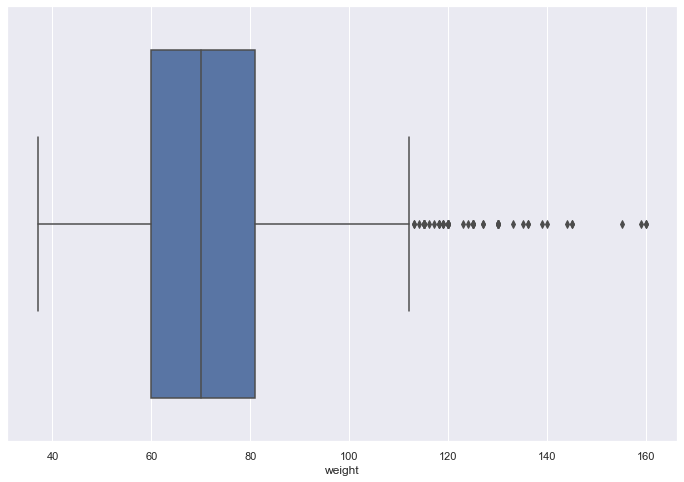

In [37]:
sns.boxplot(amostra_peso)

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [70]:
amostra_peso_log = np.log(amostra_peso)
def q4():
    if (sct.normaltest(amostra_peso_log)[1] > 0.05):
        return True
    else:
        return False
    pass
q4()

False

__Para refletir__:

4. Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?


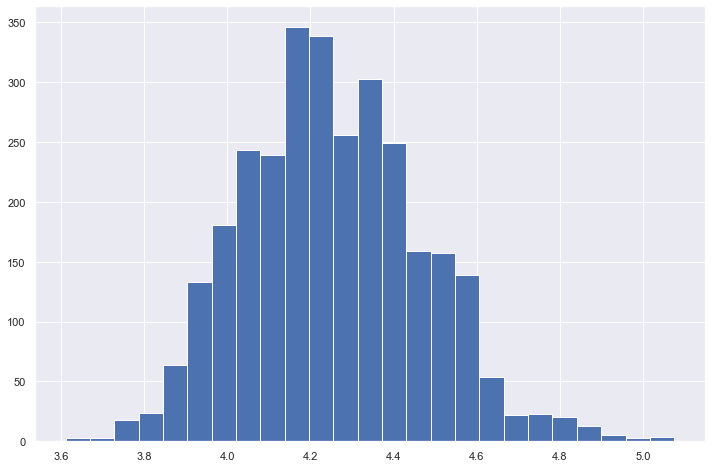

In [41]:
plt.hist(x=amostra_peso_log, bins=25);

4. Você esperava um resultado diferente agora?

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [63]:
bra = athletes[athletes['nationality'] == 'BRA']
usa = athletes[athletes['nationality'] == 'USA']
#can = athletes[athletes['nationality'] == 'CAN']
can = athletes.query("nationality == 'CAN'") # Aqui utilizo query

In [78]:
def q5():
    #print(sct.ttest_ind(bra["height"], usa["height"], equal_var=False, nan_policy="omit")[1] )
    if(sct.ttest_ind(bra["height"], usa["height"], equal_var=False, nan_policy="omit")[1] > 0.05):
        return True
    else:
        return False
    pass
q5()

False

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [81]:
def q6():
    #print(sct.ttest_ind(bra["height"], can["height"], equal_var=False, nan_policy="omit")[1] )
    if(sct.ttest_ind(bra["height"], can["height"], equal_var=False, nan_policy="omit")[1] > 0.05):
        return True
    else:
        return False
    pass
q6()

True

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [88]:
def q7():
    #print(sct.ttest_ind(usa["height"], can["height"], equal_var=False, nan_policy="omit")[1] )
    return float(round(sct.ttest_ind(usa["height"], can["height"], equal_var=False, nan_policy="omit")[1], 8))
    pass
q7()

0.00046601

__Para refletir__:

* O resultado faz sentido?

Ao visualizar os gráficos abaixo, podemos observar que a média nas questões 5 e 7 não são adequadas para um nível de significância de 5%, enquanto para a questão 6, possivelmente os valores são considerados iguais.
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?

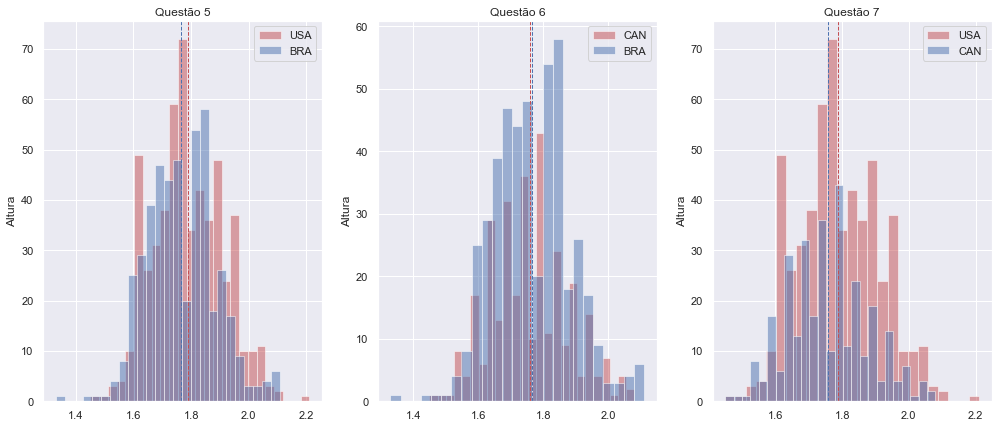

In [106]:
athletes_nan = athletes.dropna()

figsize(17, 7)
fig, axs = plt.subplots(1, 3)

axs[0].set_title('Questão 5')
axs[0].set_ylabel('Altura')
axs[0].hist(usa['height'], bins=25, alpha=0.5, color='r', label='USA')
axs[0].hist(bra['height'], bins=25, alpha=0.5, color='b', label='BRA')
axs[0].axvline(usa['height'].mean(), color='r', linestyle='dashed', linewidth=1)
axs[0].axvline(bra['height'].mean(), color='b', linestyle='dashed', linewidth=1)
axs[0].legend(loc='upper right')

axs[1].set_title('Questão 6')
axs[1].set_ylabel('Altura')
axs[1].hist(can['height'], bins=25, alpha=0.5, color='r', label='CAN')
axs[1].hist(bra['height'], bins=25, alpha=0.5, color='b', label='BRA')
axs[1].axvline(can['height'].mean(), color='r', linestyle='dashed', linewidth=1)
axs[1].axvline(bra['height'].mean(), color='b', linestyle='dashed', linewidth=1)
axs[1].legend(loc='upper right')

axs[2].set_title('Questão 7')
axs[2].set_ylabel('Altura')
axs[2].hist(usa['height'], bins=25, alpha=0.5, color='r', label='USA')
axs[2].hist(can['height'], bins=25, alpha=0.5, color='b', label='CAN')
axs[2].axvline(usa['height'].mean(), color='r', linestyle='dashed', linewidth=1)
axs[2].axvline(can['height'].mean(), color='b', linestyle='dashed', linewidth=1)
axs[2].legend(loc='upper right');